In [663]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from imblearn.over_sampling import SMOTE
from numpy.random import uniform

In [664]:
# Load the dataset
file_path = "../../data/dynamic_supply_chain_logistics_dataset.csv"
df = pd.read_csv(file_path)

df.drop(columns=['timestamp', 'vehicle_gps_latitude', 'vehicle_gps_longitude'], inplace=True)
df.head()

,fuel_consumption_rate,eta_variation_hours,traffic_congestion_level,warehouse_inventory_level,loading_unloading_time,handling_equipment_availability,order_fulfillment_status,weather_condition_severity,port_congestion_level,shipping_costs,...,iot_temperature,cargo_condition_status,route_risk_level,customs_clearance_time,driver_behavior_score,fatigue_monitoring_score,disruption_likelihood_score,delay_probability,risk_classification,delivery_time_deviation
0,5.136512,4.998009,5.927586,985.716862,4.951392,0.481294,0.761166,0.359066,4.289160,456.503853,...,0.574400,0.777263,1.182116,0.502006,0.033843,0.978599,0.506152,0.885291,Moderate Risk,9.110682
1,5.101512,0.984929,1.591992,396.700206,1.030379,0.620780,0.196594,0.230660,7.018373,640.408205,...,-9.753493,0.091839,9.611988,0.966774,0.201725,0.918586,0.980784,0.544178,High Risk,8.175281
2,5.090803,4.972665,8.787765,832.408935,4.220229,0.810933,0.152742,0.027210,9.605064,155.749314,...,-6.491034,0.253529,6.570431,0.945627,0.264045,0.394215,0.998633,0.803322,High Risk,1.283594
3,8.219558,3.095064,0.045257,0.573283,0.530186,0.008525,0.811885,0.616619,8.899616,104.317961,...,-0.151276,0.877576,0.548952,4.674035,0.362885,0.905444,0.993320,0.025977,High Risk,9.304897
4,5.000075,3.216077,8.004851,914.925067,3.620890,0.020083,0.053659,0.952385,0.061760,977.222528,...,2.429448,0.262081,8.861443,3.445429,0.016957,0.258702,0.912433,0.991122,High Risk,7.752484


In [665]:
# Cleaning Data
numerical_list = [x for x in df.columns if df[x].dtype in ('int64','float64')]
print(numerical_list)

['fuel_consumption_rate', 'eta_variation_hours', 'traffic_congestion_level', 'warehouse_inventory_level', 'loading_unloading_time', 'handling_equipment_availability', 'order_fulfillment_status', 'weather_condition_severity', 'port_congestion_level', 'shipping_costs', 'supplier_reliability_score', 'lead_time_days', 'historical_demand', 'iot_temperature', 'cargo_condition_status', 'route_risk_level', 'customs_clearance_time', 'driver_behavior_score', 'fatigue_monitoring_score', 'disruption_likelihood_score', 'delay_probability', 'delivery_time_deviation']


In [666]:
#Removal of outlier:

df1 = df.copy()

for i in numerical_list:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
# display(df1.head())
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(df.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df1.shape[0]))
df = df1.copy()
df.head()


Inference:
Before removal of outliers, The dataset had 32065 samples.
After removal of outliers, The dataset now has 25245 samples.


,fuel_consumption_rate,eta_variation_hours,traffic_congestion_level,warehouse_inventory_level,loading_unloading_time,handling_equipment_availability,order_fulfillment_status,weather_condition_severity,port_congestion_level,shipping_costs,...,iot_temperature,cargo_condition_status,route_risk_level,customs_clearance_time,driver_behavior_score,fatigue_monitoring_score,disruption_likelihood_score,delay_probability,risk_classification,delivery_time_deviation
0,5.136512,4.998009,5.927586,985.716862,4.951392,0.481294,0.761166,0.359066,4.289160,456.503853,...,0.574400,0.777263,1.182116,0.502006,0.033843,0.978599,0.506152,0.885291,Moderate Risk,9.110682
1,5.101512,0.984929,1.591992,396.700206,1.030379,0.620780,0.196594,0.230660,7.018373,640.408205,...,-9.753493,0.091839,9.611988,0.966774,0.201725,0.918586,0.980784,0.544178,High Risk,8.175281
2,5.090803,4.972665,8.787765,832.408935,4.220229,0.810933,0.152742,0.027210,9.605064,155.749314,...,-6.491034,0.253529,6.570431,0.945627,0.264045,0.394215,0.998633,0.803322,High Risk,1.283594
3,8.219558,3.095064,0.045257,0.573283,0.530186,0.008525,0.811885,0.616619,8.899616,104.317961,...,-0.151276,0.877576,0.548952,4.674035,0.362885,0.905444,0.993320,0.025977,High Risk,9.304897
4,5.000075,3.216077,8.004851,914.925067,3.620890,0.020083,0.053659,0.952385,0.061760,977.222528,...,2.429448,0.262081,8.861443,3.445429,0.016957,0.258702,0.912433,0.991122,High Risk,7.752484


In [667]:
df['risk_classification'].value_counts()

risk_classification
High Risk        20451
Moderate Risk     4277
Low Risk           517
Name: count, dtype: int64

In [668]:
# Label encoding

label_encoder = LabelEncoder()
df['risk_classification'] = label_encoder.fit_transform(df['risk_classification'])

In [669]:
df['risk_classification'].value_counts()

risk_classification
0    20451
2     4277
1      517
Name: count, dtype: int64

                                       Correlation Matrix                                       


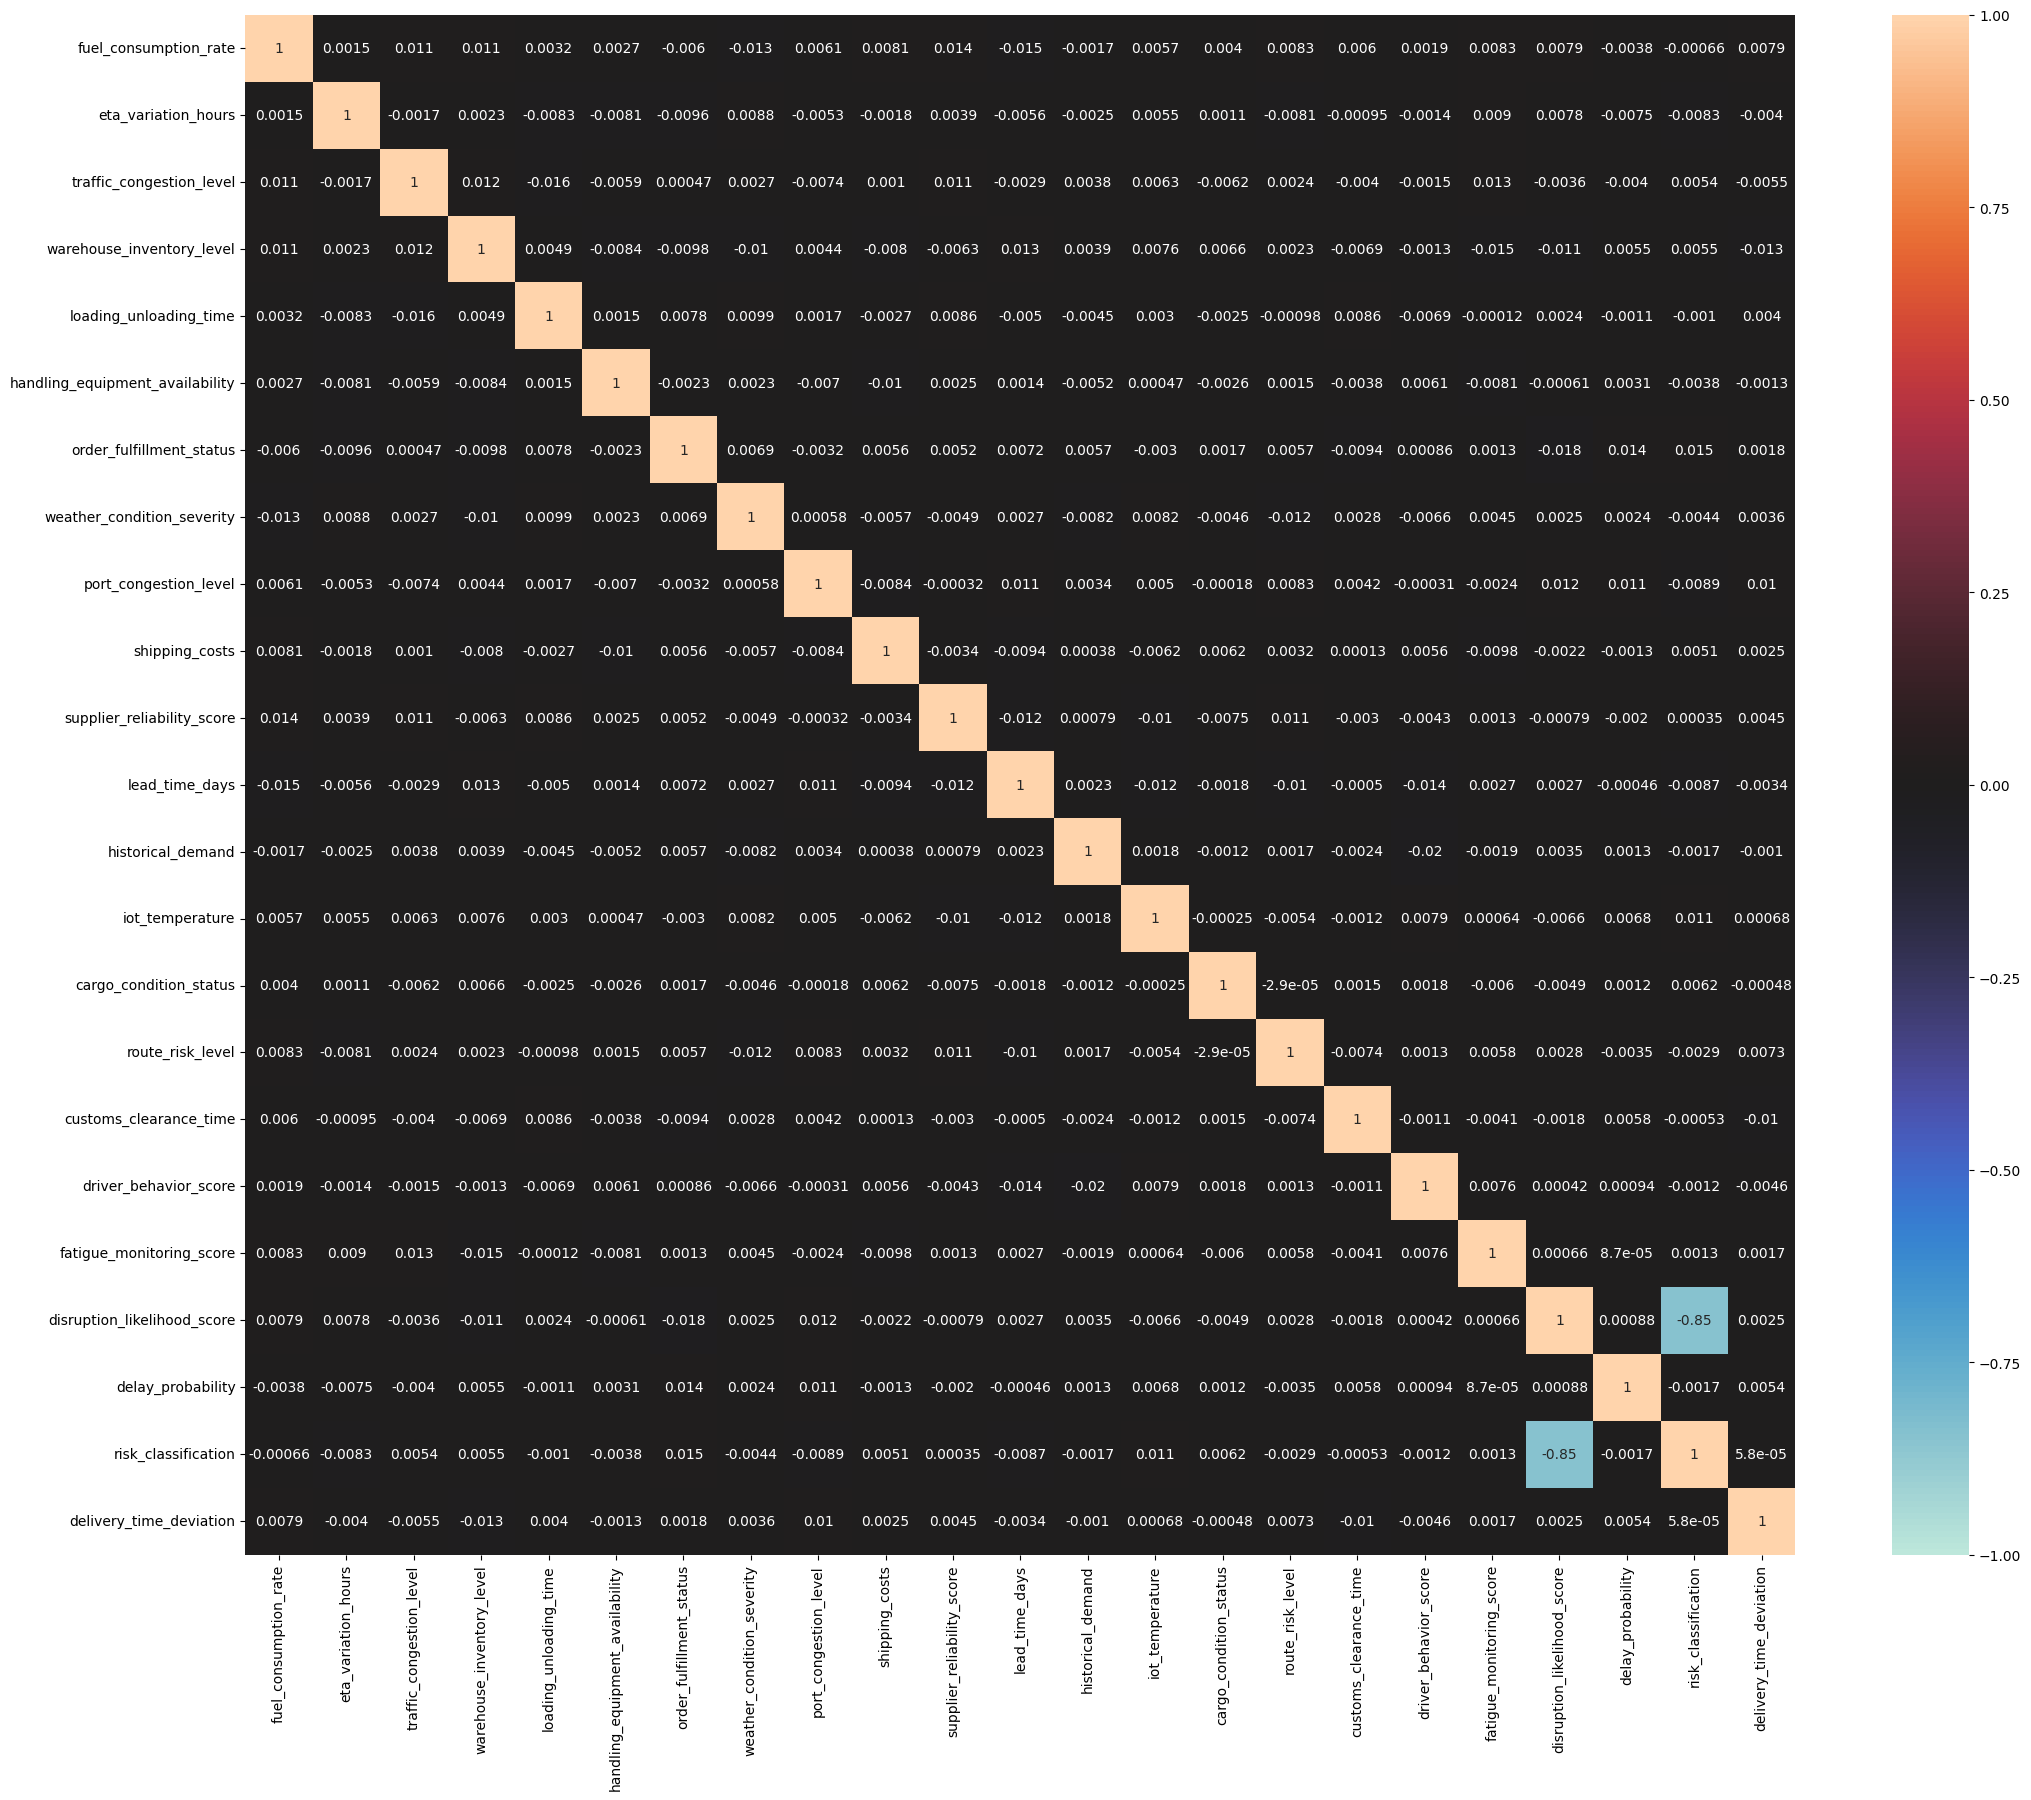

In [670]:
# check correlation
# calculate correlation between each numerical feature and the encoded risk_classification

print('\033[1mCorrelation Matrix'.center(100))
plt.figure(figsize=[25,20])
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()

In [671]:
# import pandas as pd
# from imblearn.over_sampling import SMOTE

# X = df.drop(columns=["risk_classification"])
# Y = df["risk_classification"]

# # Apply SMOTE to handle any remaining imbalance
# smote = SMOTE(sampling_strategy="auto", random_state=42)
# X, Y = smote.fit_resample(X, Y)

# # Visualize the new class distribution
# ax = Y.value_counts().plot.pie(autopct='%.2f')
# _ = ax.set_title("Over-sampling")

# print(Y.value_counts())

In [672]:
# # Step 1: Randomly select 3000 samples from class 0 and class 2
# df_0 = df[df["risk_classification"] == 0].sample(n=600, random_state=42)
# df_2 = df[df["risk_classification"] == 2].sample(n=600, random_state=42)

# # Step 2: Keep all samples from class 1 (517 samples)
# df_1 = df[df["risk_classification"] == 1]

# # Step 3: Combine the selected data
# df_balanced = pd.concat([df_0, df_2, df_1], axis=0)

# # Step 4: Split into features and target variable
# X = df_balanced.drop(columns=["risk_classification"])
# Y = df_balanced["risk_classification"]

# # Step 5: Apply SMOTE to oversample class 1 to 3000 instances
# smote = SMOTE(sampling_strategy={1: 600}, random_state=42)
# X_resampled, Y_resampled = smote.fit_resample(X, Y)

# # Step 6: Visualize the new class distribution
# ax = Y_resampled.value_counts().plot.pie(autopct='%.2f')
# _ = ax.set_title("Over-sampling")

# print(Y_resampled.value_counts())

risk_classification
0    50
2    50
1    50
Name: count, dtype: int64


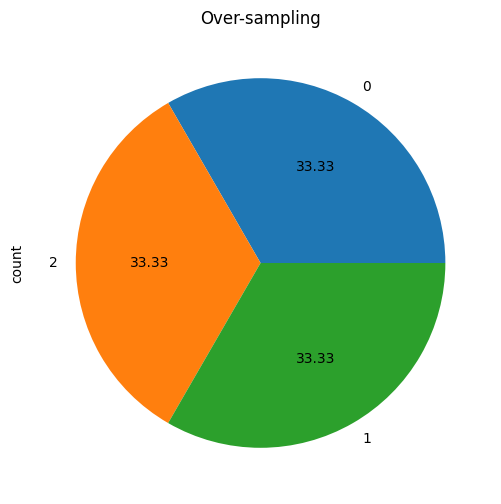

In [673]:
# Step 1: Randomly select 50 samples from class 0 and class 2
df_0 = df[df["risk_classification"] == 0].sample(n=50, random_state=42)
df_2 = df[df["risk_classification"] == 2].sample(n=50, random_state=42)
df_1 = df[df["risk_classification"] == 1].sample(n=50, random_state=42)

# Step 3: Combine the selected data
df_balanced = pd.concat([df_0, df_2, df_1], axis=0)

# Step 4: Split into features and target variable
X = df_balanced.drop(columns=["risk_classification"])
Y = df_balanced["risk_classification"]

# Step 6: Visualize the new class distribution
ax = Y.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

print(Y.value_counts())

In [674]:
# Split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state = 42)

In [675]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.10379973, 0.        , 0.05677558, 0.        , 0.05274241,
       0.02169435, 0.        , 0.07031127, 0.        , 0.        ,
       0.05375481, 0.04352387, 0.11461236, 0.01866849, 0.        ,
       0.13449269, 0.09823175, 0.07355646, 0.        , 1.08441774,
       0.        , 0.        ])

In [676]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

disruption_likelihood_score        1.084418
route_risk_level                   0.134493
historical_demand                  0.114612
fuel_consumption_rate              0.103800
customs_clearance_time             0.098232
driver_behavior_score              0.073556
weather_condition_severity         0.070311
traffic_congestion_level           0.056776
supplier_reliability_score         0.053755
loading_unloading_time             0.052742
lead_time_days                     0.043524
handling_equipment_availability    0.021694
iot_temperature                    0.018668
eta_variation_hours                0.000000
warehouse_inventory_level          0.000000
port_congestion_level              0.000000
shipping_costs                     0.000000
order_fulfillment_status           0.000000
cargo_condition_status             0.000000
fatigue_monitoring_score           0.000000
delay_probability                  0.000000
delivery_time_deviation            0.000000
dtype: float64

<Axes: >

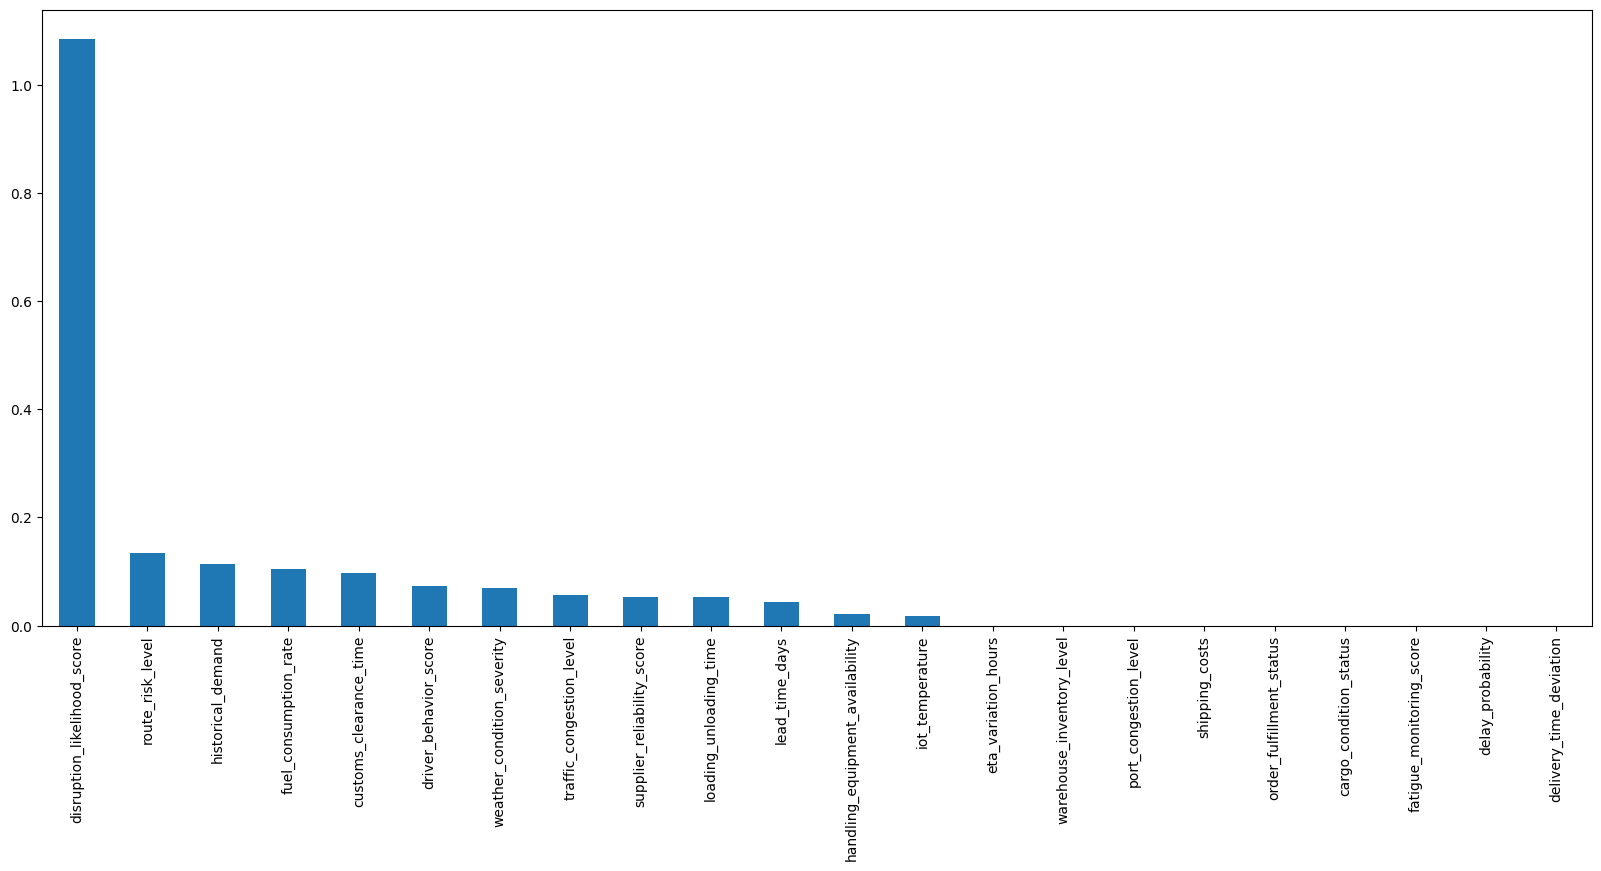

In [677]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [678]:
from sklearn.feature_selection import SelectKBest

#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=2)
sel_five_cols.fit(X_train, y_train)
selected_feature = X_train.columns[sel_five_cols.get_support()]
print(f"Top 2 Feature: {selected_feature}")

Top 2 Feature: Index(['route_risk_level', 'disruption_likelihood_score'], dtype='object')


In [679]:
X_train = X_train[selected_feature]
X_test = X_test[selected_feature]

X_train

,route_risk_level,disruption_likelihood_score
11393,0.755490,0.889519
15245,9.998295,0.997788
7729,9.999746,0.296554
19790,9.473725,0.416832
17516,9.993359,0.462077
...,...,...
3251,3.939997,0.503017
10322,5.113323,0.290783
17215,7.679150,0.999974
688,9.337303,0.491349


In [680]:
# Transform data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
print(X_train_scaled)
X_test_scaled = scaler.transform(X_test)

[[0.06592327 0.85462751]
 [0.99983783 0.99709161]
 [0.9999844  0.07438524]
 [0.94683405 0.23265101]
 [0.99933909 0.29218557]
 [0.99154262 0.88806019]
 [0.99441284 0.99999365]
 [0.99463299 0.56008069]
 [0.88518428 0.06737085]
 [0.60121158 0.02250531]
 [0.99961669 0.22266317]
 [0.1325285  0.05259461]
 [0.20074823 0.34261269]
 [0.98549873 0.07407218]
 [0.81419725 0.51973044]
 [0.65439642 0.99998979]
 [0.79324787 0.02019597]
 [0.88623386 0.56270404]
 [0.0465186  0.99987423]
 [0.99124926 0.9999974 ]
 [0.95452864 0.99892262]
 [0.94722528 0.53605117]
 [0.01951249 0.06826925]
 [0.99197978 0.99996153]
 [0.99926199 0.62741723]
 [0.89520981 0.99995949]
 [0.00619315 0.52676674]
 [0.60404323 0.9996459 ]
 [0.2499033  0.5229706 ]
 [0.83232079 0.06111703]
 [0.87367196 0.99600801]
 [0.87279717 0.50975586]
 [0.95343514 0.02534655]
 [0.98644647 0.99878065]
 [0.94551926 0.01810963]
 [0.07032749 0.05567793]
 [0.7196149  0.13039881]
 [0.58636193 0.36800443]
 [0.98285337 0.06900027]
 [0.         0.25449659]


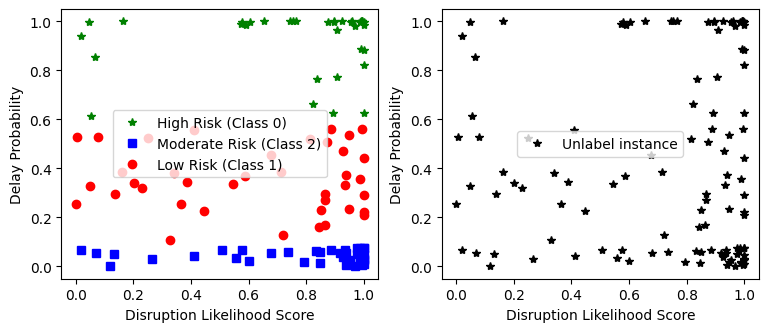

In [681]:
plt.figure(figsize=(9, 3.5))
plt.subplot(121,)
plt.plot(X_train_scaled[y_train==0,0], X_train_scaled[y_train==0,1], "g*", label="High Risk (Class 0)")
plt.plot(X_train_scaled[y_train==1,0], X_train_scaled[y_train==1,1], "bs", label="Moderate Risk (Class 2)")
plt.plot(X_train_scaled[y_train==2,0], X_train_scaled[y_train==2,1], "ro", label="Low Risk (Class 1)")
plt.ylabel("Delay Probability", fontsize=10)
plt.xlabel("Disruption Likelihood Score", fontsize=10)
plt.legend(fontsize=10)
plt.subplot(122,)
plt.plot(X_train_scaled[:,0], X_train_scaled[:,1], "k*", label="Unlabel instance")
plt.ylabel("Delay Probability", fontsize=10)
plt.xlabel("Disruption Likelihood Score", fontsize=10)
plt.legend(fontsize=10)
plt.show()

In [682]:
# First, we will create a helper function to calculate the Euclidean distance between two points.
def euclidean(point, centroid):
  return np.sqrt(np.sum((point - centroid) ** 2))

In [683]:

def showplot(centroids):
  plt.figure(figsize=(9, 3.5))
  plt.plot(X_train_scaled[:,0], X_train_scaled[:,1], "k*", label="Unlabel instance")
  plt.plot([x for x, _ in centroids],[y for _, y in centroids], '+', markersize=10,)
  plt.ylabel("Delay Probability", fontsize=10)
  plt.xlabel("Disruption Likelihood Score", fontsize=10)
  plt.legend(fontsize=10)
  plt.show()

In [684]:

# Next, we need a way to initialize the starting point of each centroid.
# We will calculate it by uniformly distributing each centroid in the graph.

n_clusters = 3 # The data set have 3 class hench 3 cluster centroids we need to make

minpoint, maxpoint = np.min(X_train_scaled[:,:], axis=0), np.max(X_train_scaled[:,:], axis=0)
centroids = np.array([uniform(low=minpoint, high=maxpoint) for _ in range(n_clusters)])

print(minpoint, maxpoint)
print(centroids)

[0. 0.] [1. 1.]
[[0.10175096 0.96151748]
 [0.0031175  0.80688456]
 [0.85979001 0.34104323]]


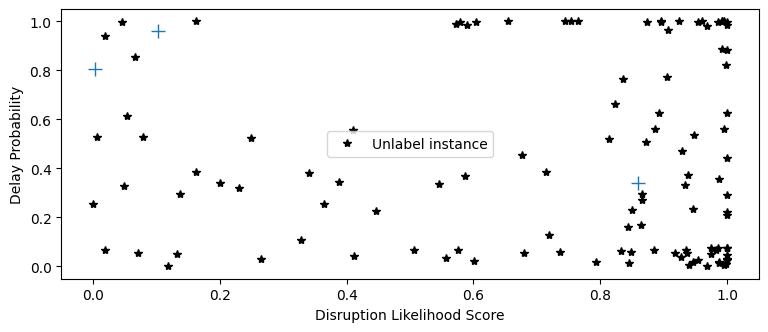

In [685]:
showplot(centroids)

In [686]:
def showplotwithclass(sorted_x, centroids):
    plt.figure(figsize=(9, 3.5))

    colors = plt.cm.tab20.colors

    for i, cluster_points in enumerate(sorted_x):
        if len(cluster_points) == 0:  # Skip empty clusters
            continue
        cluster_points = np.array(cluster_points)
        plt.plot(cluster_points[:, 0], cluster_points[:, 1],
                 marker='o', linestyle='', color=colors[i % len(colors)],
                 label=f"Class {i} instances")

    plt.plot([x for x, _ in centroids],
             [y for _, y in centroids],
             'k+', markersize=10, label="Centroids")

    plt.xlabel("Disruption Likelihood Score", fontsize=10)
    plt.ylabel("Delay Probability", fontsize=10)
    plt.legend(fontsize=10)
    plt.show()

In [687]:

def calculateClass(X, centroids):
  sorted_x = [[] for _ in range(n_clusters)]  # Independent lists
  for x in X:
    dists = [euclidean(x, centroid) for centroid in centroids]
    centroid_idx = np.argmin(dists)
    sorted_x[centroid_idx].append(x)

  sorted_x = [np.array(cluster) for cluster in sorted_x]

  showplotwithclass(sorted_x, centroids)
  return sorted_x

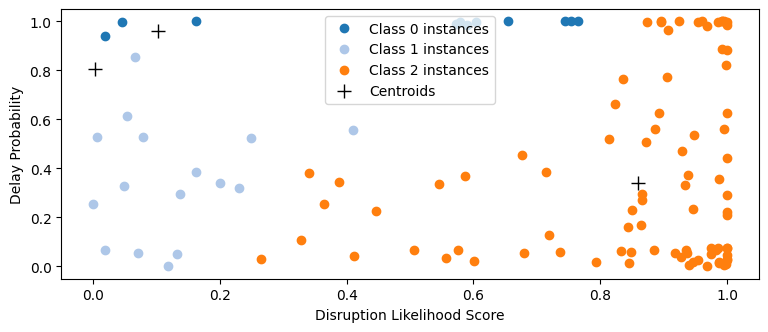

In [688]:
res = calculateClass(X_train_scaled, centroids)

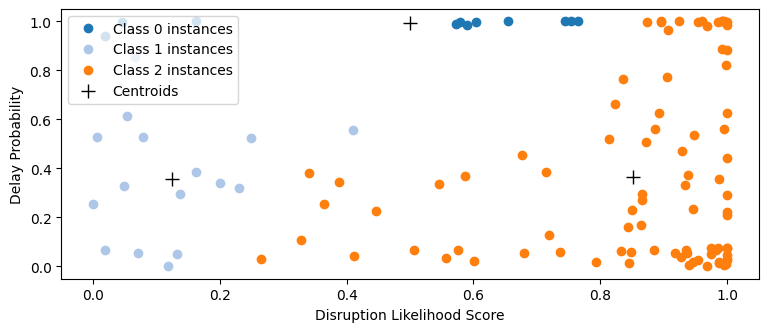

In [689]:
def adjustCentroid(sorted_x, centroids):
  prev_centroids = centroids
  centroids = [np.mean(cluster, axis=0) for cluster in sorted_x]
  for i, centroid in enumerate(centroids):
    if np.isnan(centroid).any():  # Catch any np.nans, resulting from a centroid having no points
      centroids[i] = prev_centroids[i]

  showplotwithclass(sorted_x, centroids)
  return centroids
res = adjustCentroid(res, centroids)

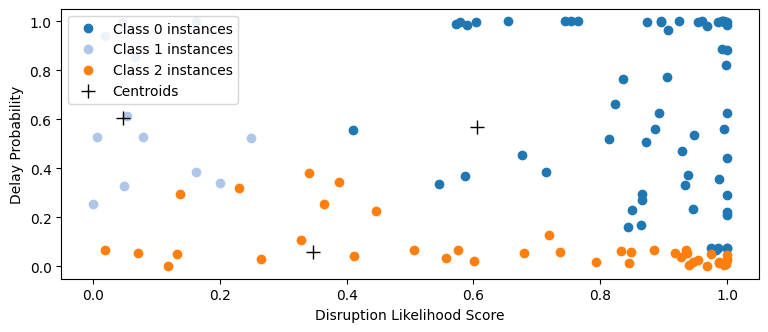

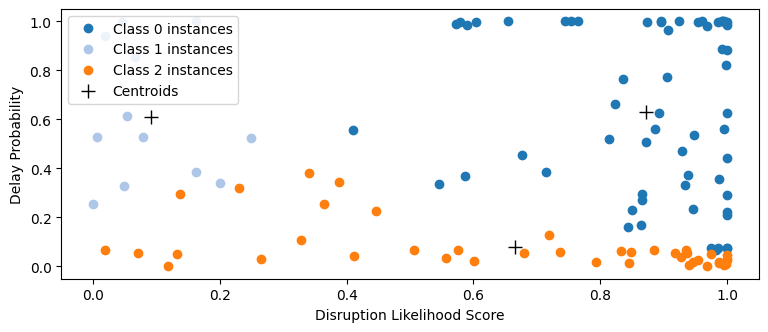

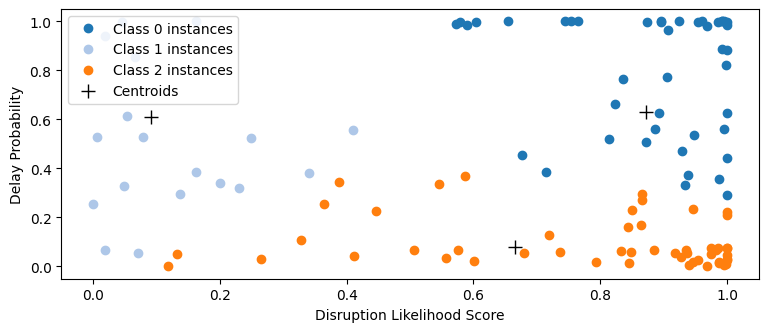

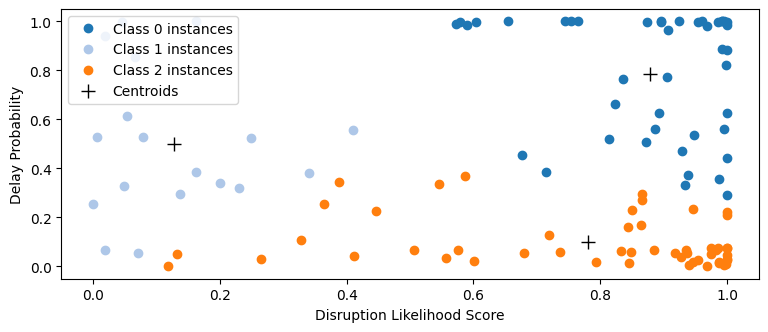

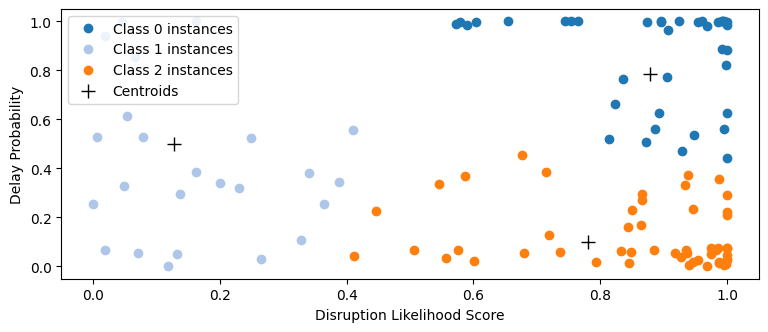

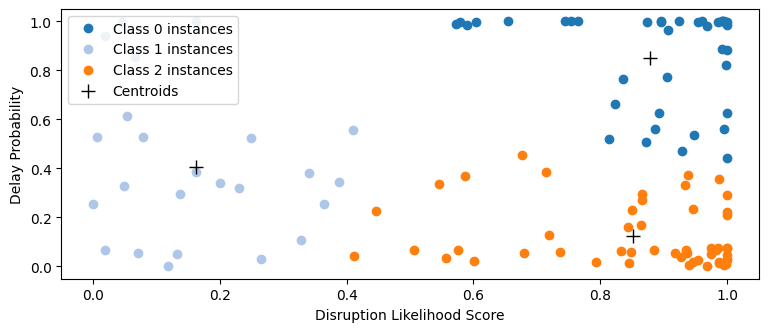

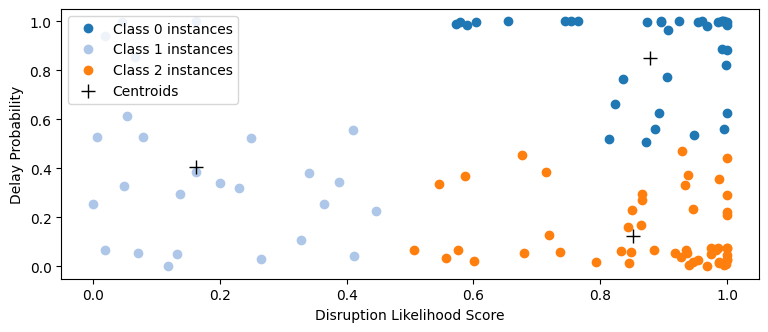

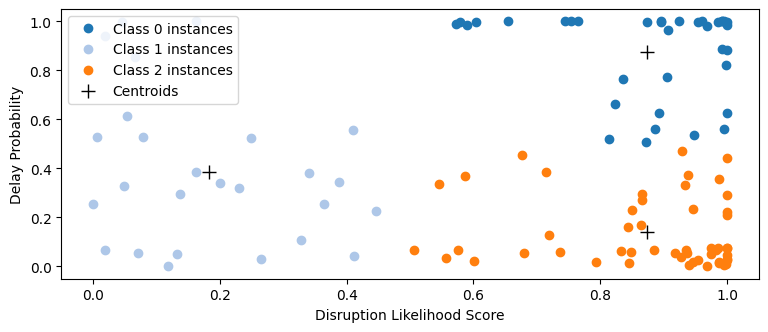

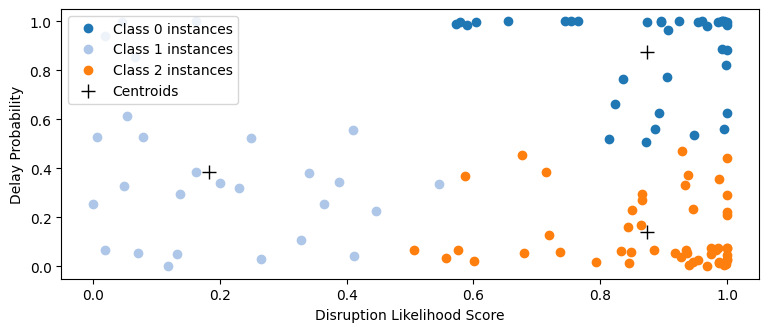

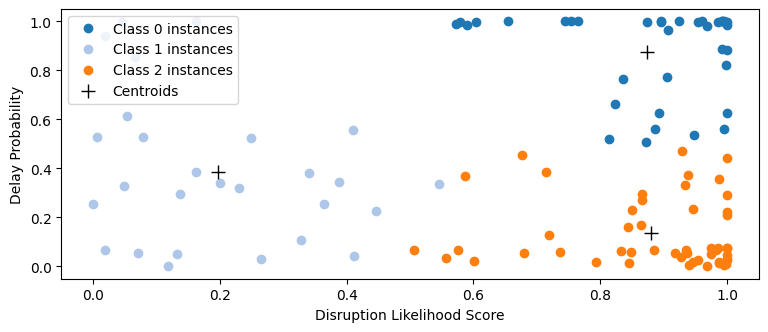

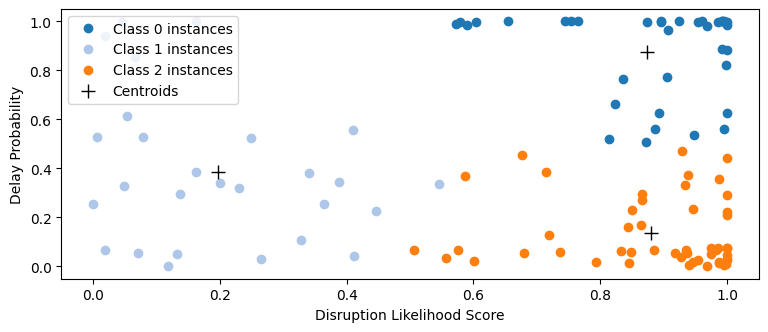

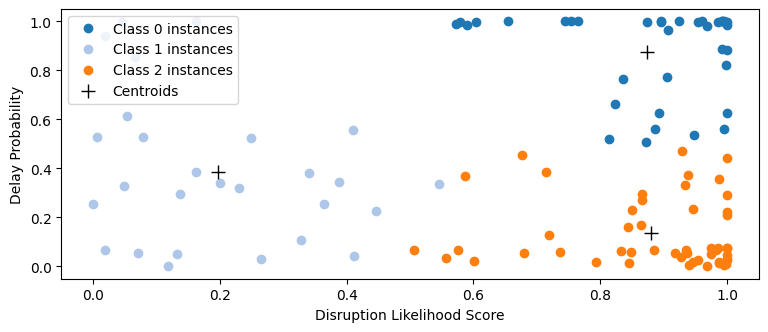

In [690]:
def train(X, n_clusters):
  minpoint, maxpoint = np.min(X[:,:], axis=0), np.max(X[:,:], axis=0)
  centroids = np.array([uniform(low=minpoint, high=maxpoint) for _ in range(n_clusters)])
  while True:
    sorted_x = calculateClass(X, centroids)
    new_centroid = adjustCentroid(sorted_x, centroids)
    if np.allclose(centroids, new_centroid): break
    centroids = new_centroid
train(X_train_scaled, 3)